## print_w

In [1]:
def print_w(w):
    params = ["radius", "texture","perimeter","area",
              "smoothness","compactness","concavity","concave points",
              "symmetry","fractal dimension"]
    print("    (params)      :    ",end="")
    print("   (mean)     (stderr)      (worst)")
    for i, param in enumerate(params):
        print("%18s:" %param, end="")
        for j in range(3):
            print("%13.9f" % w[i*3+j], end="")
        print()

## データの読み込みと初期化

In [2]:
import numpy as np
tmp = np.fromfile('./train_A.data', np.float64, -1, " ")
A = tmp.reshape(300,30)
tmp = np.fromfile('./train_b.data', np.float64, -1, " ")
b = tmp.reshape(300,1)
w = np.zeros(30).reshape(30,1)
for i in range(30):
    w[i] = 0

## 最急降下法によるw探索(steepest descent)

In [3]:
loop, sigma = 300, 3.0*10**(-9)
for i in range(loop):
  dLw = A.dot(w)-b
  w = w - (dLw.transpose().dot(A)).transpose()*sigma

print_w(w)

    (params)      :       (mean)     (stderr)      (worst)
            radius:  0.000426997  0.000741817  0.002548876
           texture:  0.001687946  0.000004707  0.000000127
         perimeter: -0.000003968 -0.000002078  0.000008954
              area:  0.000003595  0.000002569  0.000070324
        smoothness:  0.000001139 -0.000881778  0.000000430
       compactness:  0.000000441  0.000000723  0.000000267
         concavity:  0.000001200  0.000000191  0.000411499
    concave points:  0.000921972  0.002395138 -0.001932789
          symmetry:  0.000005930 -0.000003750 -0.000008147
 fractal dimension: -0.000002341  0.000011565  0.000003523


# 結果

In [4]:
def show_accuracy(mA, vb, vw):
    # M:悪性(-1)，B:良性(1)

    correct,safe_error,critical_error=0,0,0
    predict = mA.dot(vw)
    n = 30
    for i in range(n):
        if predict[i]*vb[i]>0:
            correct += 1
        elif (predict[i]<0 and vb[i]>0):
            safe_error += 1
        elif (predict[i]>0 and vb[i]<0):
            critical_error += 1
    print("       correct: %4d/%4d" % (correct,n))
    print("    safe error: %4d" % safe_error)
    print("critical error: %4d" % critical_error)


# 問１

In [5]:
show_accuracy(A, b, w)

       correct:   27/  30
    safe error:    0
critical error:    3


# 問２

1.

In [6]:
A.shape

(300, 30)

In [7]:
w.shape

(30, 1)

In [8]:
b.shape

(300, 1)

In [9]:
A.dot(w).shape

(300, 1)

In [10]:
dLw = A.dot(w)-b
(dLw.transpose()).dot(dLw)

array([[ 202.30396791]])

# 問３

<IPython.core.display.Javascript object>


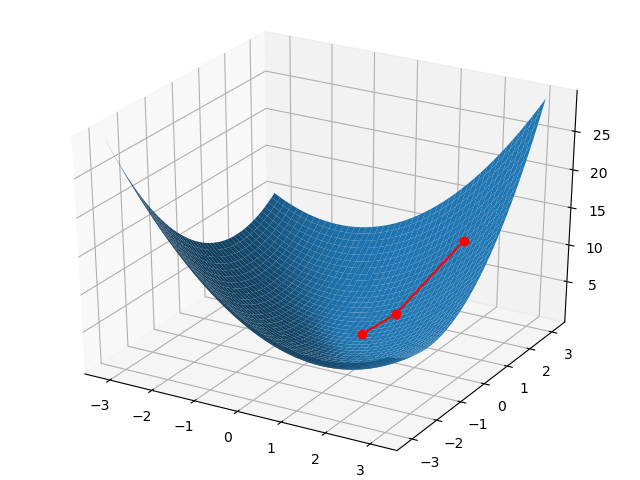

In [11]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
def f(x,y):
    return x**2+y**2+x*y
x = np.arange(-np.pi, np.pi, 0.02)
y = np.arange(-np.pi, np.pi, 0.02)
X, Y = np.meshgrid(x, y)
Z1 = f(X,Y)
x_p = [2, 1, 0.5]
y_p = [2, 1, 0.5]
z_p = [f(x_p[0], y_p[0]),f(x_p[1], y_p[1]),
 f(x_p[2], y_p[2])]

fig = plt.figure()
plot3d = Axes3D(fig)
plot3d.plot(x_p, y_p, z_p, "o-", color="red")
plot3d.plot_surface(X,Y,Z1)
plt.show()